## Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA 
from sklearn.impute import SimpleImputer
from scipy.stats import chi2_contingency
from scipy import stats
from scipy.stats import ttest_ind
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Acquire Data

In [2]:
# Read the churn dataset into a dataframe as variable df.
df = pd.read_csv('churn_clean.csv')
df = pd.DataFrame(df)
# Quick look at the data.
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


## Gather insight

In [3]:
# Print information about the dataset.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [4]:
# Print statistical description of columns in the dataset. 
print(df.describe(include='all'))

          CaseOrder Customer_id                           Interaction  \
count   10000.00000       10000                                 10000   
unique          NaN       10000                                 10000   
top             NaN     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
freq            NaN           1                                     1   
mean     5000.50000         NaN                                   NaN   
std      2886.89568         NaN                                   NaN   
min         1.00000         NaN                                   NaN   
25%      2500.75000         NaN                                   NaN   
50%      5000.50000         NaN                                   NaN   
75%      7500.25000         NaN                                   NaN   
max     10000.00000         NaN                                   NaN   

                                     UID     City  State      County  \
count                              10000    10000  

In [5]:
# Print the data type of each column.
print(df.dtypes)

CaseOrder                 int64
Customer_id              object
Interaction              object
UID                      object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
TimeZone                 object
Job                      object
Children                  int64
Age                       int64
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSe

In [6]:
# Print the sum of mising values in each column.
print(df.isnull().sum())

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [7]:
# Print the percentage of missing values for each column.
print(df.isnull().sum() / len(df) * 100)

CaseOrder               0.0
Customer_id             0.0
Interaction             0.0
UID                     0.0
City                    0.0
State                   0.0
County                  0.0
Zip                     0.0
Lat                     0.0
Lng                     0.0
Population              0.0
Area                    0.0
TimeZone                0.0
Job                     0.0
Children                0.0
Age                     0.0
Income                  0.0
Marital                 0.0
Gender                  0.0
Churn                   0.0
Outage_sec_perweek      0.0
Email                   0.0
Contacts                0.0
Yearly_equip_failure    0.0
Techie                  0.0
Contract                0.0
Port_modem              0.0
Tablet                  0.0
InternetService         0.0
Phone                   0.0
Multiple                0.0
OnlineSecurity          0.0
OnlineBackup            0.0
DeviceProtection        0.0
TechSupport             0.0
StreamingTV         

In [8]:
# Print the sum of duplicates in each column. 
print(df.duplicated().sum())

0


In [9]:
# Print unique values for categorical columns.
for col in df.select_dtypes(include='object').columns:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in Customer_id: ['K409198' 'S120509' 'K191035' ... 'I243405' 'I641617' 'T38070']
Unique values in Interaction: ['aa90260b-4141-4a24-8e36-b04ce1f4f77b'
 'fb76459f-c047-4a9d-8af9-e0f7d4ac2524'
 '344d114c-3736-4be5-98f7-c72c281e2d35' ...
 'e8307ddf-9a01-4fff-bc59-4742e03fd24f'
 '3775ccfc-0052-4107-81ae-9657f81ecdf3'
 '9de5fb6e-bd33-4995-aec8-f01d0172a499']
Unique values in UID: ['e885b299883d4f9fb18e39c75155d990' 'f2de8bef964785f41a2959829830fb8a'
 'f1784cfa9f6d92ae816197eb175d3c71' ... '9c41f212d1e04dca84445019bbc9b41c'
 '3e1f269b40c235a1038863ecf6b7a0df' '0ea683a03a3cd544aefe8388aab16176']
Unique values in City: ['Point Baker' 'West Branch' 'Yamhill' ... 'Haubstadt' 'West Kill'
 'Clarkesville']
Unique values in State: ['AK' 'MI' 'OR' 'CA' 'TX' 'GA' 'TN' 'OK' 'FL' 'OH' 'PA' 'PR' 'IA' 'ME'
 'IL' 'WI' 'NC' 'AL' 'NM' 'VT' 'MD' 'NY' 'WA' 'CT' 'NJ' 'DC' 'ND' 'LA'
 'NE' 'WV' 'AZ' 'MO' 'WY' 'MT' 'VA' 'KY' 'MN' 'KS' 'MA' 'IN' 'SC' 'NH'
 'DE' 'MS' 'ID' 'AR' 'SD' 'CO' 'HI' 'UT' 'RI' 

## Data Cleaning

In [10]:
# Create variable to hold dtype changes
data_type_corrections = {  
    'Item1': 'str',
    'Item2': 'str',
    'Item3': 'str',
    'Item4': 'str',
    'Item5': 'str',
    'Item6': 'str',
    'Item7': 'str',
    'Item8': 'str',
    'CaseOrder':'str',
    'Zip':'str'
   
}

# Change data types
for column, dtype in data_type_corrections.items():
    df[column] = df[column].astype(dtype)
    


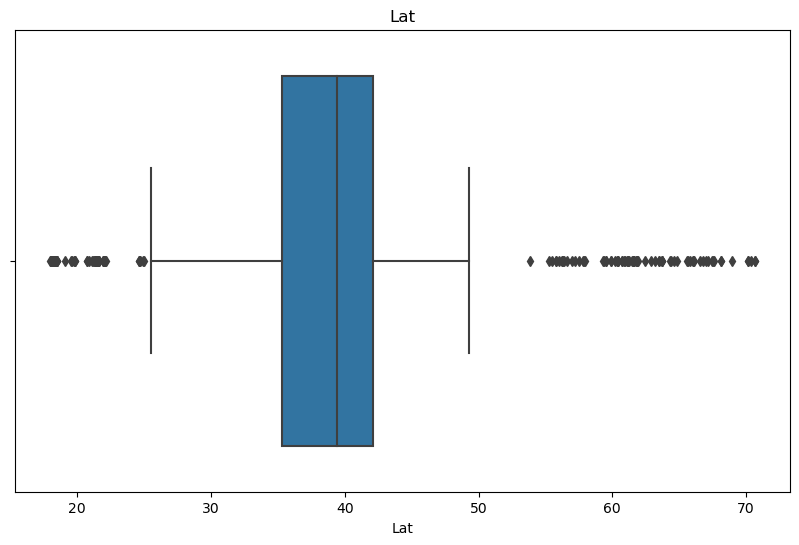

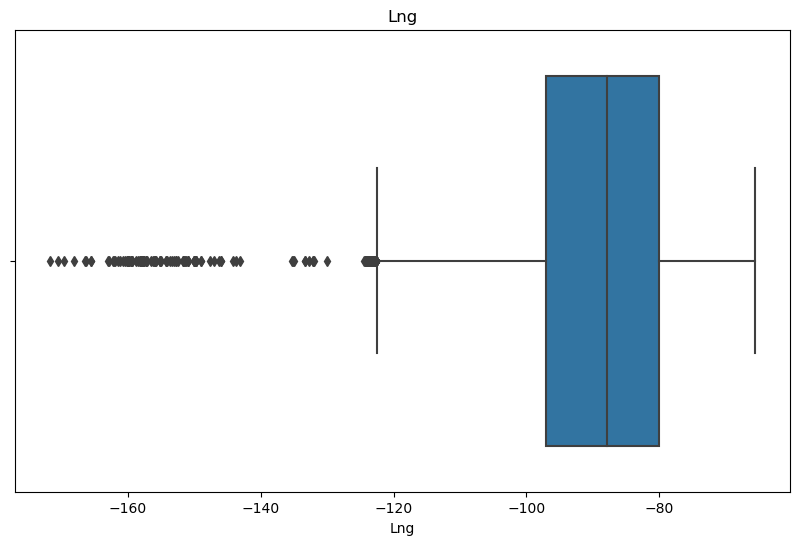

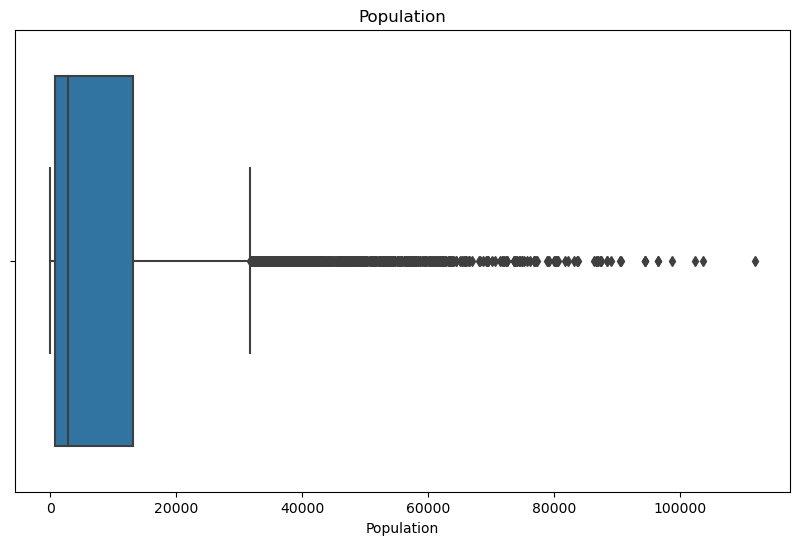

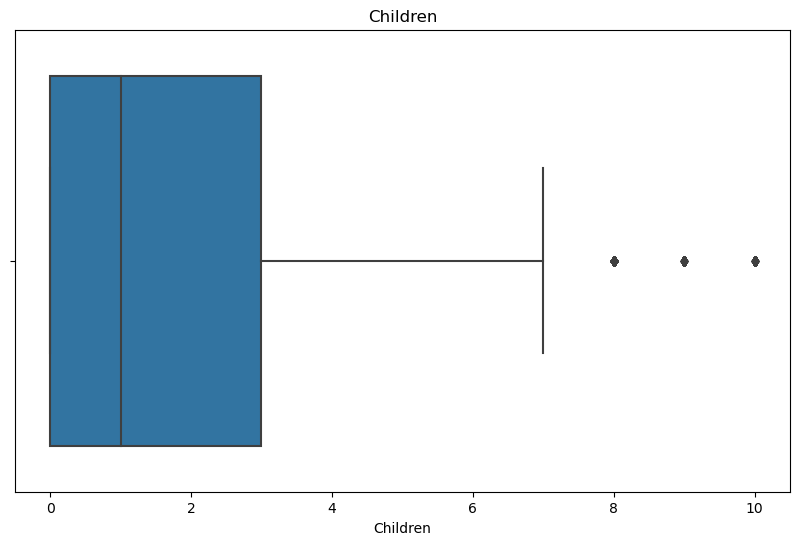

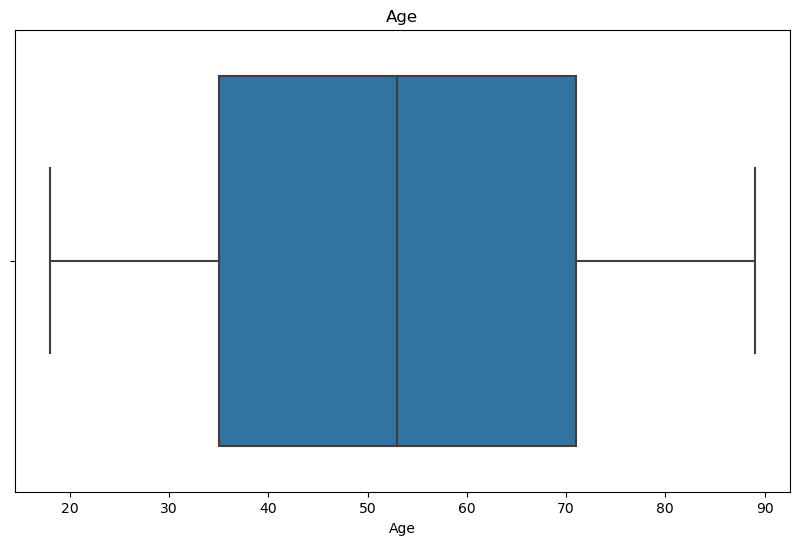

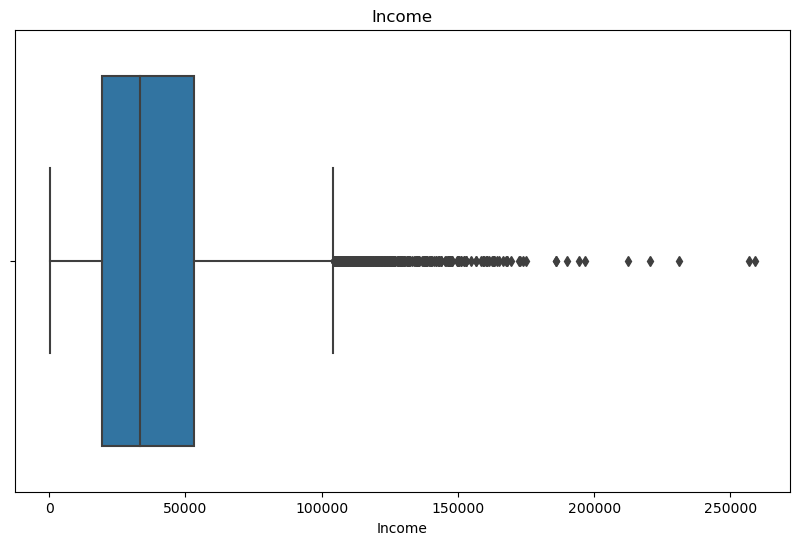

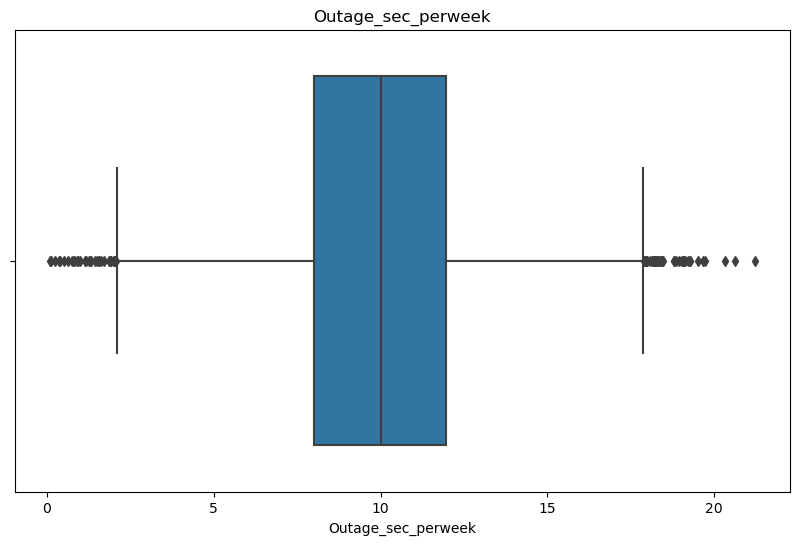

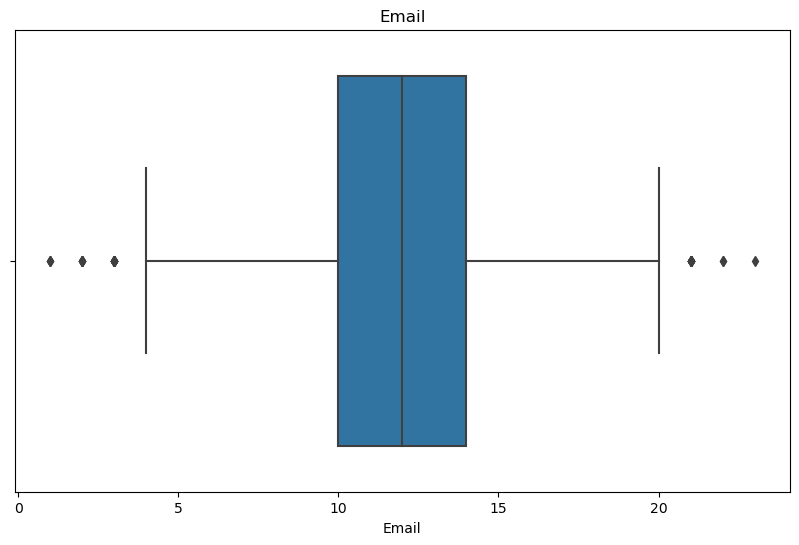

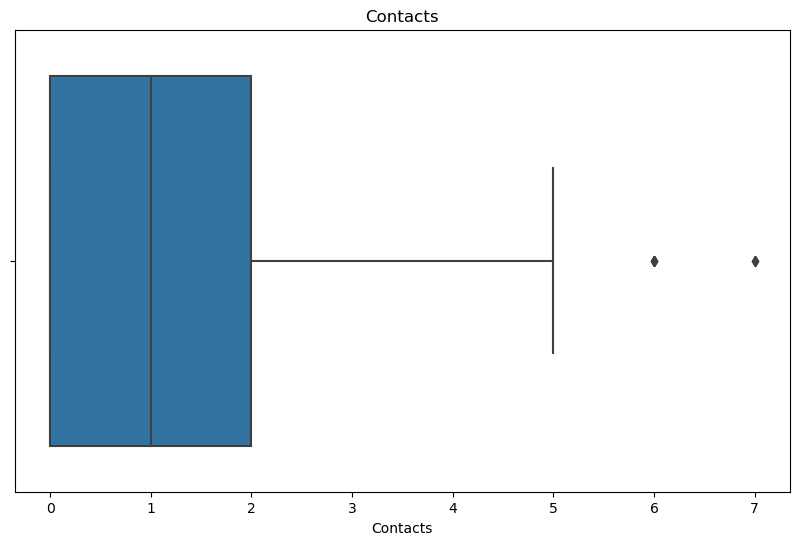

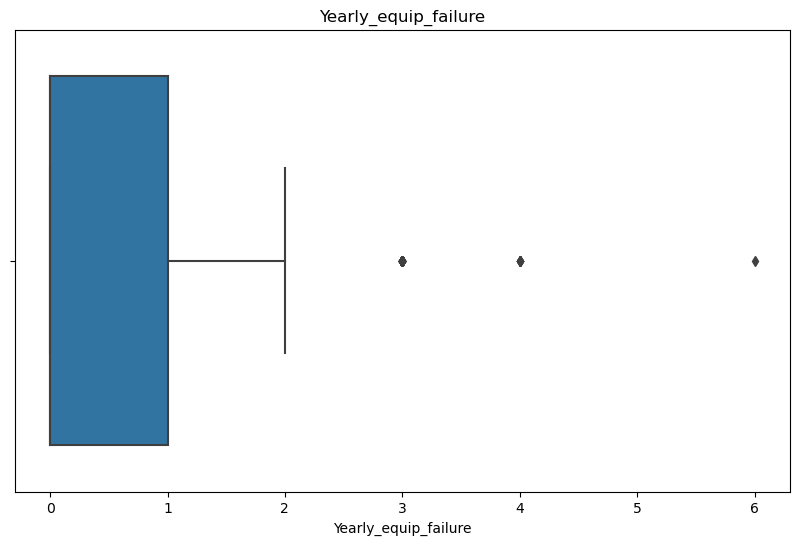

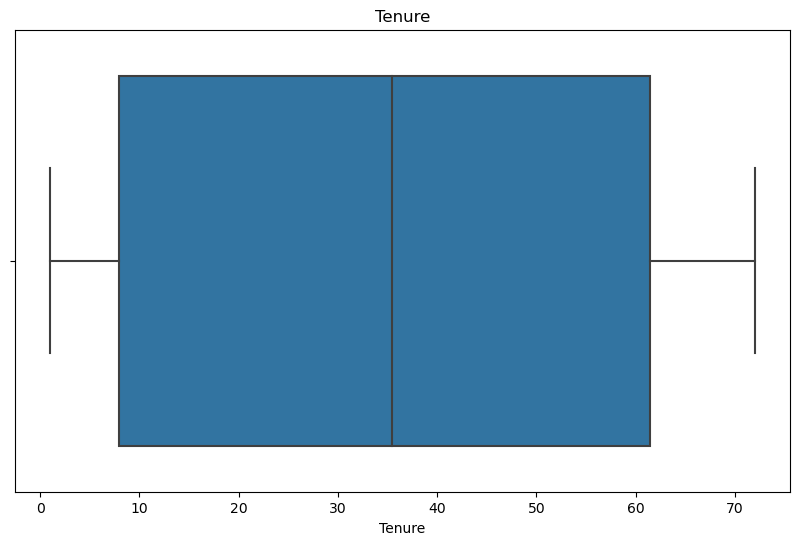

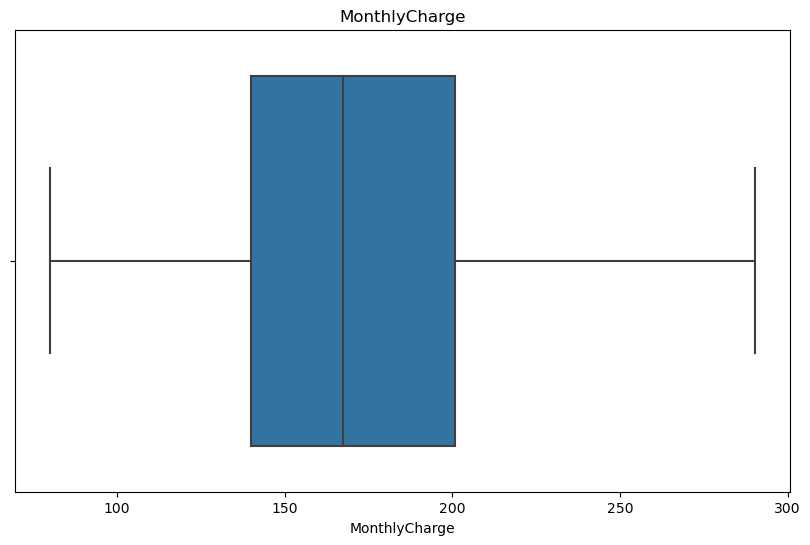

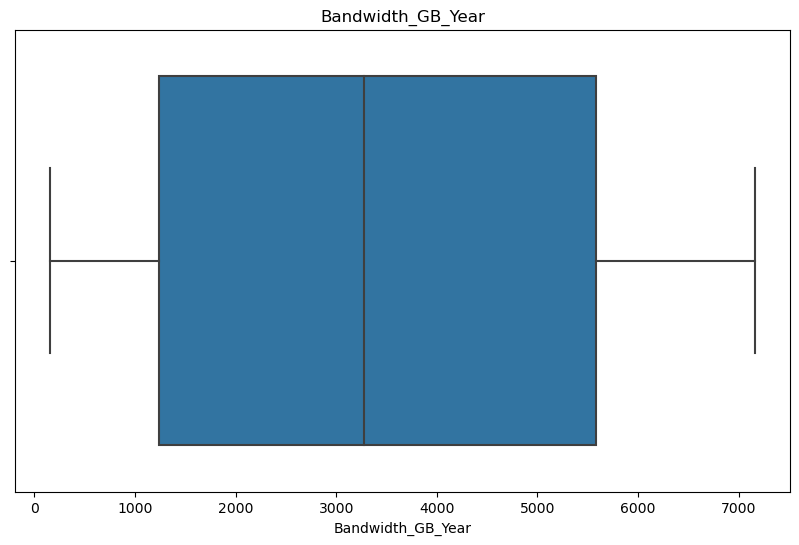

In [11]:
# Create boxplots to visualize outliers in columns.
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'{col}')
    plt.show()

In [12]:
# Renaming item columns.
rename_columns = {
    'Item1': 'Timely response',
    'Item2': 'Timely fixes',
    'Item3': 'Timely replacements',
    'Item4': 'Reliability',
    'Item5': 'Options',
    'Item6': 'Respectful response',
    'Item7': 'Courteous exchange',
    'Item8': 'Evidence of active listening'
}

df.rename(columns=rename_columns, inplace=True)


# Function to replace outliers with the median.
def replace_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find the median value.
    median_value = df[column].median()
    
    # Replace outliers with median.
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median_value, df[column])


# Apply the function to all numerical columns.
numerical_columns = df.select_dtypes(include=[np.number]).columns

for col in numerical_columns:
    replace_outliers(df, col)

In [13]:
# Round numerical values 
df = df.round(2)

# Final look before saving to csv.
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Timely response,Timely fixes,Timely replacements,Reliability,Options,Respectful response,Courteous exchange,Evidence of active listening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,39.40,-87.92,...,172.46,904.54,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.33,-84.24,...,242.63,800.98,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.36,-87.92,...,159.95,2054.71,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.97,-117.25,...,119.96,2164.58,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38,-95.81,...,149.95,271.49,4,4,4,3,4,4,4,5


In [14]:
# Print statistical description of columns in the dataset. 
df[['MonthlyCharge', 'Bandwidth_GB_Year', 'Outage_sec_perweek', 'Contacts', 'Yearly_equip_failure']].describe()

,MonthlyCharge,Bandwidth_GB_Year,Outage_sec_perweek,Contacts,Yearly_equip_failure
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,172.624724,3392.341505,9.993481,0.989900,0.368800
std,42.943016,2185.294958,2.876488,0.976572,0.578464
min,79.980000,155.510000,2.090000,0.000000,0.000000
25%,139.980000,1236.470000,8.050000,0.000000,0.000000
50%,167.480000,3279.535000,10.020000,1.000000,0.000000
75%,200.737500,5586.145000,11.930000,2.000000,1.000000
max,290.160000,7158.980000,17.860000,5.000000,2.000000


In [15]:
df[['Contract', 'InternetService', 'PaymentMethod', 'TechSupport', 'OnlineSecurity']].describe()

,Contract,InternetService,PaymentMethod,TechSupport,OnlineSecurity
count,10000,10000,10000,10000,10000
unique,3,3,4,2,2
top,Month-to-month,Fiber Optic,Electronic Check,No,No
freq,5456,4408,3398,6250,6424


In [16]:
# Create a variable for the cleaned data and save file to csv. 
d208_cleaned_data = 'd208_cleaned_data.csv'
df.to_csv(d208_cleaned_data, index=False)

## PCA

In [17]:
# Separate numeric and categorical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Select only numerical columns for PCA
numerical_data = df[numerical_columns]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Get the loading matrix
loading_matrix = pd.DataFrame(pca.components_.T, index=numerical_columns, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
print("Loading Matrix with All Features:")
print(loading_matrix)

# Identify churn-related features
churn_related_features = [col for col in df.columns if 'Churn' in col.lower()]

# Check if churn-related features are correctly identified
print("Churn-related features: ", churn_related_features)

if churn_related_features:
    # Extract the loadings for churn-related features
    churn_loadings = loading_matrix.loc[churn_related_features]

    # Identify the principal components related to churn by checking high loadings
    # Threshold set at 5 to select significant components
    significant_components = churn_loadings.abs().mean().nlargest(5).index

    # Display the identified principal components related to churn
    print("Principal Components related to Churn:")
    print(significant_components)
else:
    print("No churn-related features found.")

Loading Matrix with All Features:
                           PC1       PC2       PC3       PC4       PC5  \
Lat                  -0.017572 -0.668637  0.273527 -0.177743 -0.053411   
Lng                  -0.001186 -0.040173  0.722947  0.078146 -0.374725   
Population           -0.000518  0.648281  0.264959  0.190986 -0.124189   
Children              0.010142 -0.132192  0.154760  0.555572 -0.013537   
Age                   0.001896  0.097168  0.129208 -0.304414  0.044722   
Income               -0.002463 -0.238801  0.030070  0.018026 -0.109508   
Outage_sec_perweek    0.012023  0.030468  0.351245 -0.013261  0.514158   
Email                -0.017227  0.142074 -0.106220 -0.383663 -0.238207   
Contacts              0.002640  0.088578  0.183845 -0.529111  0.327149   
Yearly_equip_failure  0.011503 -0.080766 -0.085659  0.305659  0.558571   
Tenure                0.705455 -0.009502 -0.020856 -0.018866 -0.031037   
MonthlyCharge         0.040870  0.107048  0.338453 -0.055263  0.293026   
Band

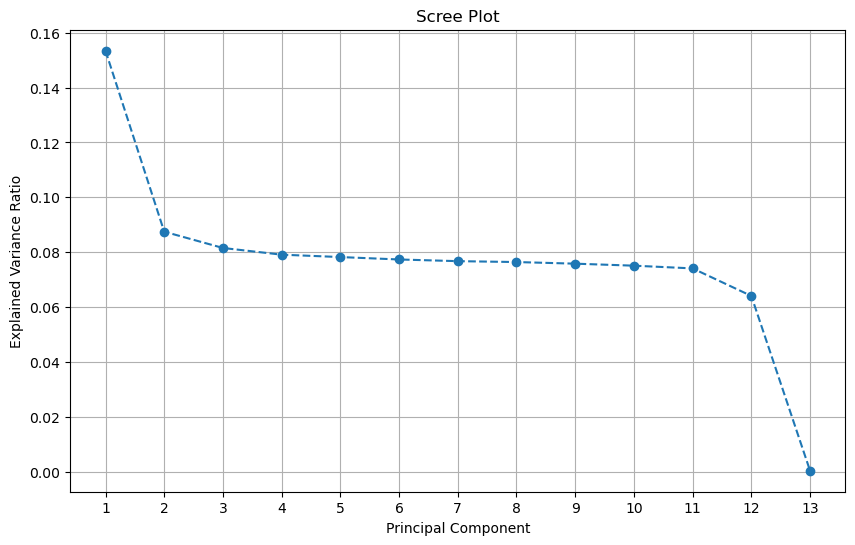

In [18]:
# Explained varience scree plot
explained_variance = pca.explained_variance_ratio_

#Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()


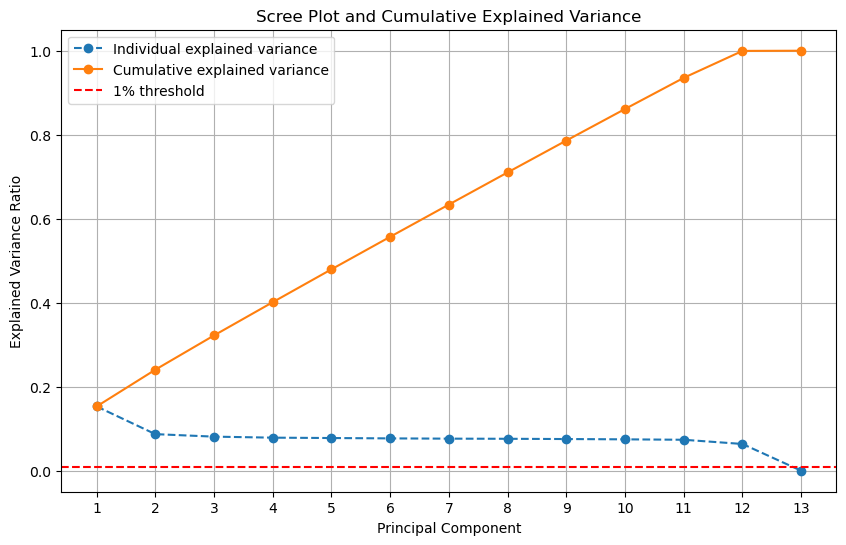

Explained variance ratio for each component:
PC1: 0.1534
PC2: 0.0875
PC3: 0.0816
PC4: 0.0791
PC5: 0.0783
PC6: 0.0774
PC7: 0.0768
PC8: 0.0764
PC9: 0.0758
PC10: 0.0751
PC11: 0.0741
PC12: 0.0641
PC13: 0.0004

Cumulative explained variance ratio:
PC1: 0.1534
PC2: 0.2409
PC3: 0.3225
PC4: 0.4016
PC5: 0.4798
PC6: 0.5572
PC7: 0.6340
PC8: 0.7104
PC9: 0.7862
PC10: 0.8613
PC11: 0.9355
PC12: 0.9996
PC13: 1.0000


In [19]:
# Take a look at cumulative and individual explained variance
# Explained variance
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance.cumsum()

# Scree plot with cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', label='Individual explained variance')
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', label='Cumulative explained variance')
plt.axhline(y=0.01, color='r', linestyle='--', label='1% threshold')
plt.title('Scree Plot and Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.legend()
plt.grid()
plt.show()

# Print explained variance for each component
print("Explained variance ratio for each component:")
for i, variance in enumerate(explained_variance, start=1):
    print(f"PC{i}: {variance:.4f}")

# Print cumulative explained variance
print("\nCumulative explained variance ratio:")
for i, cumulative_variance in enumerate(cumulative_explained_variance, start=1):
    print(f"PC{i}: {cumulative_variance:.4f}")

# Data Exploration

# Univariate Visualizations / Statistics

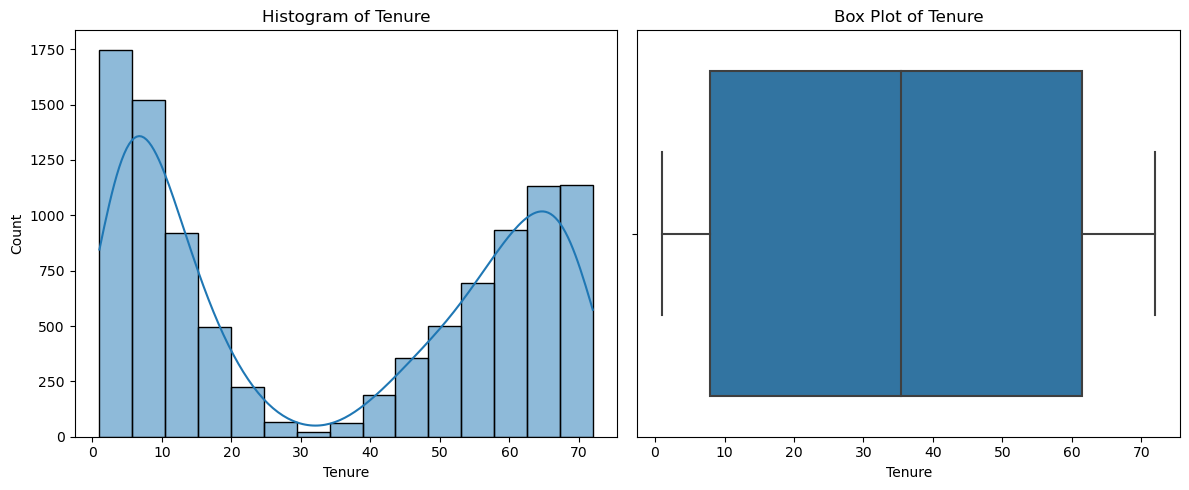

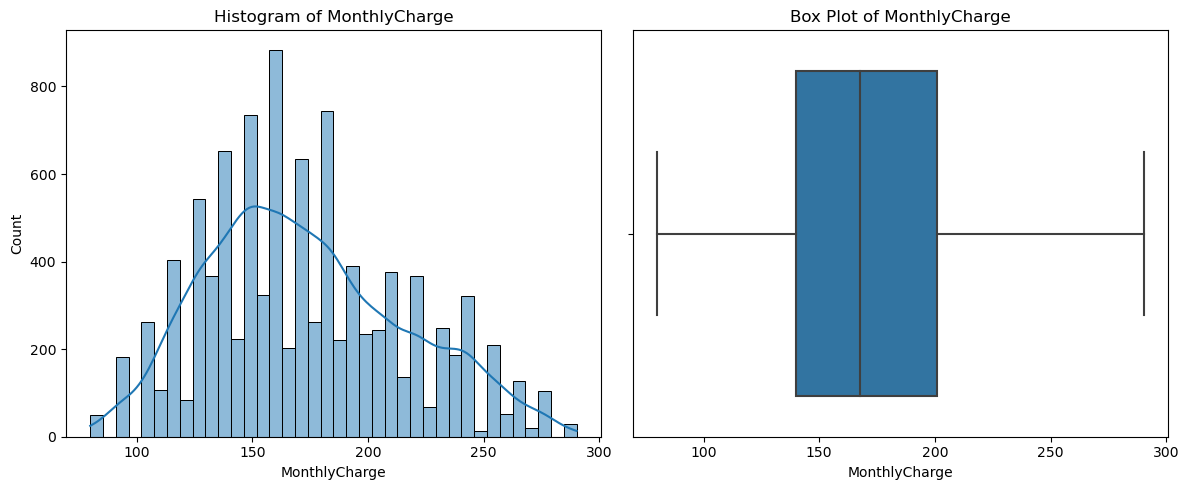

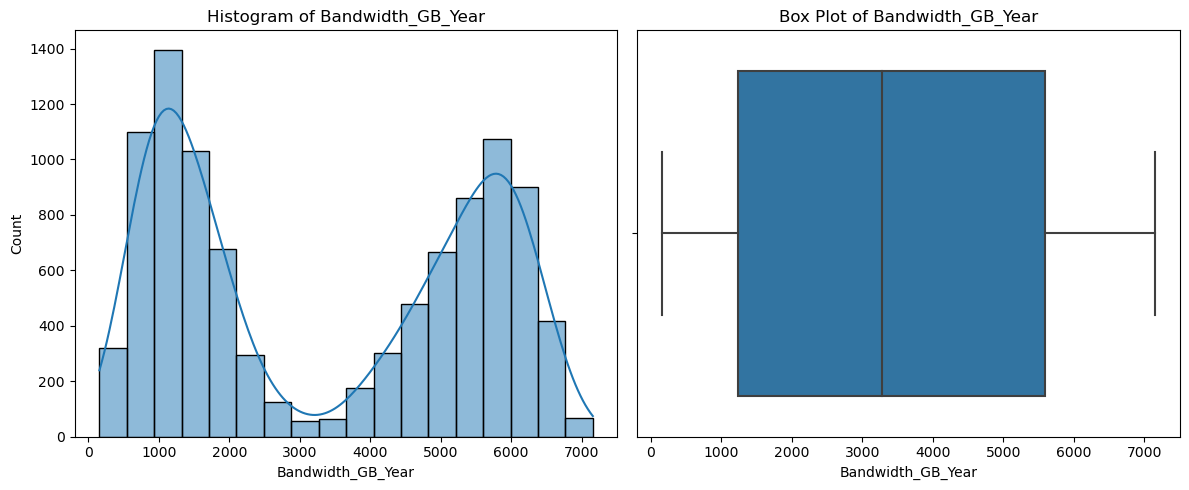

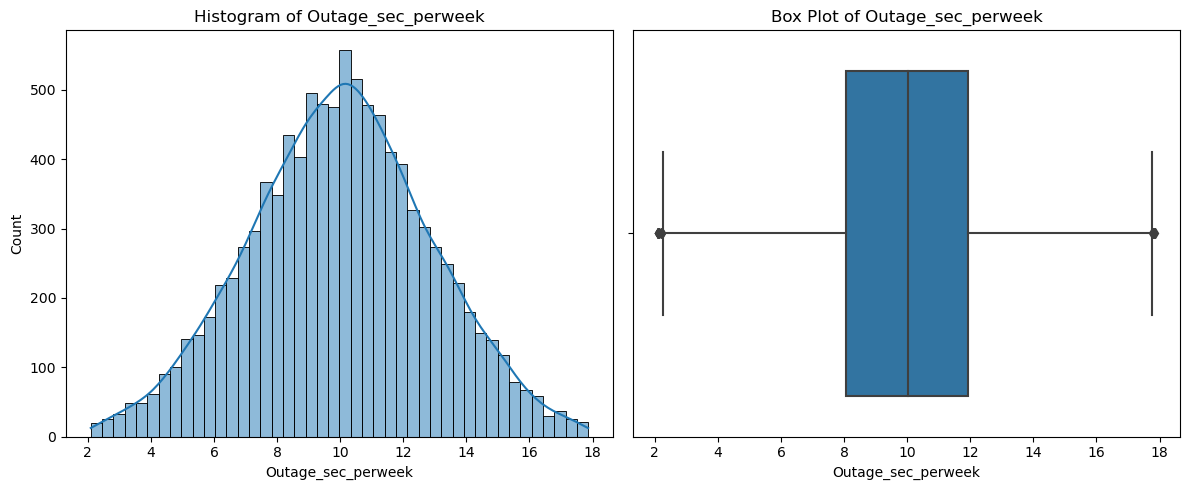

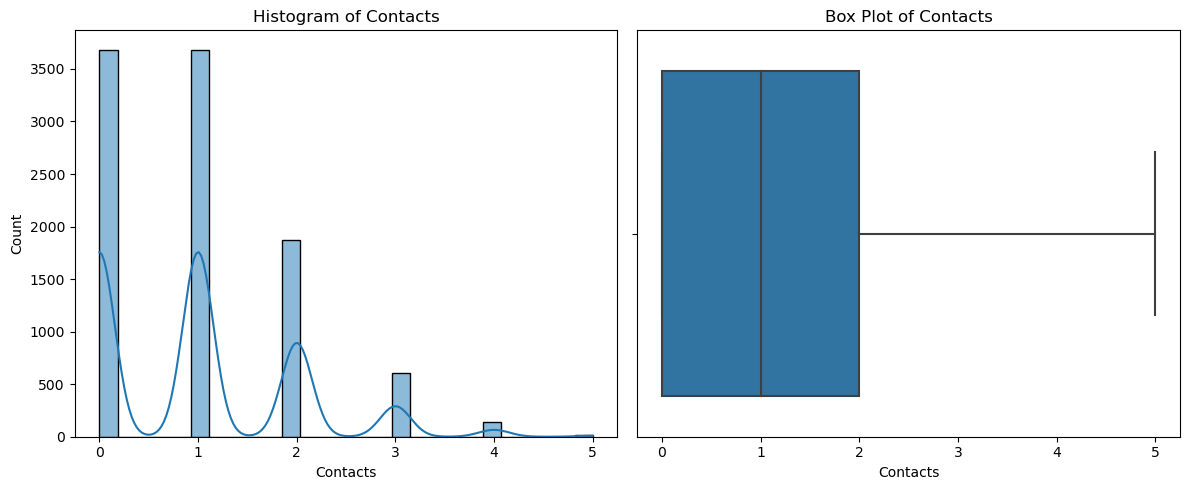

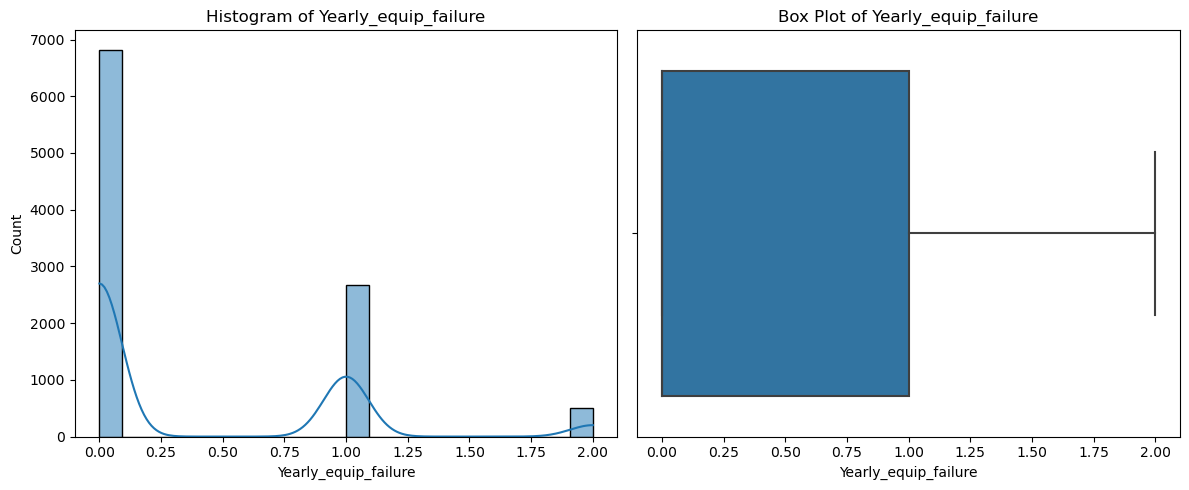

In [20]:
# Univariate statistics for numerical variables
numerical_vars = ['Tenure','MonthlyCharge', 'Bandwidth_GB_Year', 'Outage_sec_perweek', 'Contacts', 'Yearly_equip_failure']
numerical_stats = df[numerical_vars].describe().T

numerical_stats['skew'] = df[numerical_vars].skew()
numerical_stats['kurtosis'] = df[numerical_vars].kurtosis()

# Visualize numerical variables
for var in numerical_vars:
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[var], kde=True)
    plt.title(f'Histogram of {var}')
    
    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[var])
    plt.title(f'Box Plot of {var}')
    
    plt.tight_layout()
    plt.show()


In [21]:
# Display univariate statistics for numerical variables
print("Univariate Statistics for Numerical Variables:")
print(numerical_stats)

Univariate Statistics for Numerical Variables:
                        count         mean          std     min      25%  \
Tenure                10000.0    34.526188    26.443077    1.00     7.92   
MonthlyCharge         10000.0   172.624724    42.943016   79.98   139.98   
Bandwidth_GB_Year     10000.0  3392.341505  2185.294958  155.51  1236.47   
Outage_sec_perweek    10000.0     9.993481     2.876488    2.09     8.05   
Contacts              10000.0     0.989900     0.976572    0.00     0.00   
Yearly_equip_failure  10000.0     0.368800     0.578464    0.00     0.00   

                           50%        75%      max      skew  kurtosis  
Tenure                  35.430    61.4800    72.00  0.068606 -1.764204  
MonthlyCharge          167.480   200.7375   290.16  0.387314 -0.462594  
Bandwidth_GB_Year     3279.535  5586.1450  7158.98  0.067483 -1.703579  
Outage_sec_perweek      10.020    11.9300    17.86 -0.012835 -0.225529  
Contacts                 1.000     2.0000     5.00  0.8

In [22]:
# Select the specified categorical variables
categorical_features = ['Contract', 'InternetService', 'PaymentMethod', 'TechSupport', 'OnlineSecurity']
# Generate univariate statistics for these variables
univariate_stats_selected = df[categorical_features].describe(include='all').transpose()

# Display the univariate statistics
print(univariate_stats_selected)

                 count unique               top  freq
Contract         10000      3    Month-to-month  5456
InternetService  10000      3       Fiber Optic  4408
PaymentMethod    10000      4  Electronic Check  3398
TechSupport      10000      2                No  6250
OnlineSecurity   10000      2                No  6424


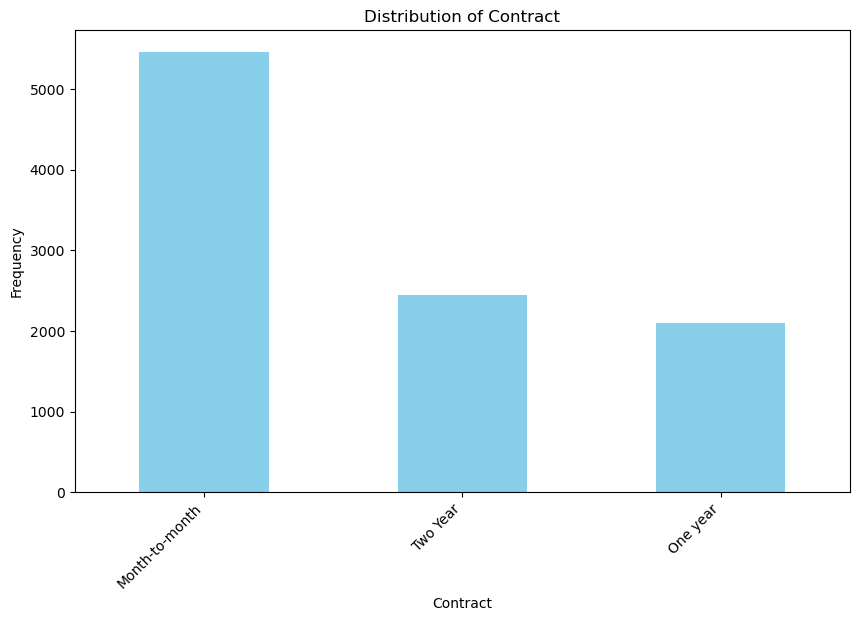


Frequency distribution for Contract:

Month-to-month    5456
Two Year          2442
One year          2102
Name: Contract, dtype: int64 



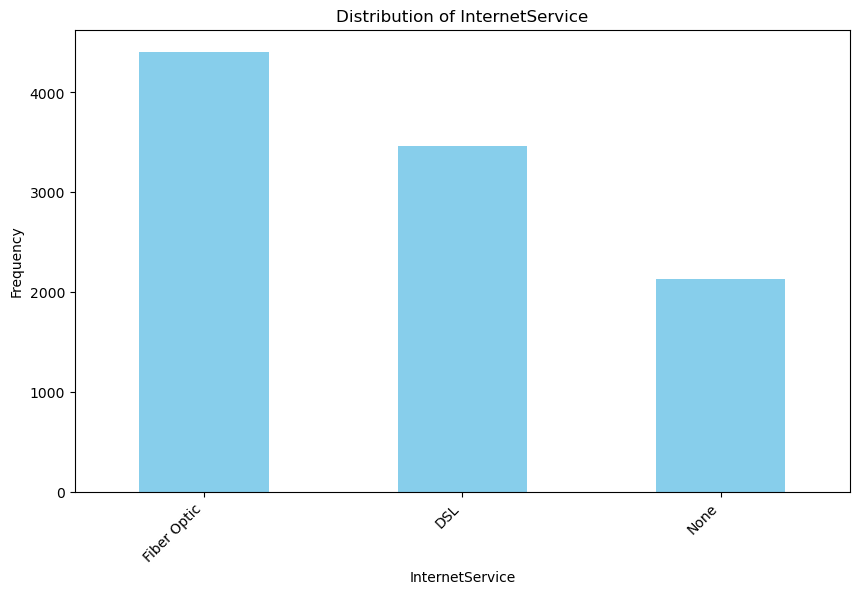


Frequency distribution for InternetService:

Fiber Optic    4408
DSL            3463
None           2129
Name: InternetService, dtype: int64 



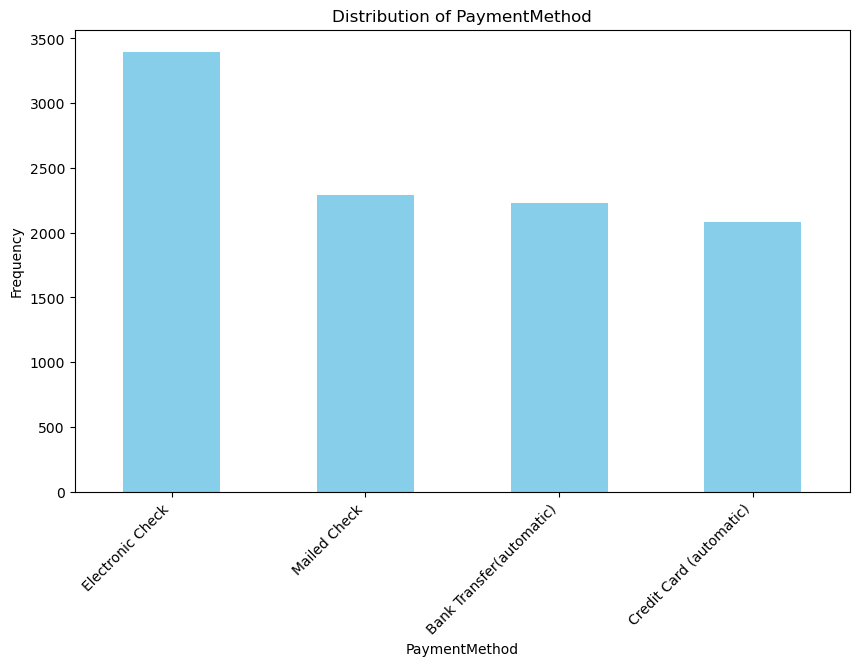


Frequency distribution for PaymentMethod:

Electronic Check            3398
Mailed Check                2290
Bank Transfer(automatic)    2229
Credit Card (automatic)     2083
Name: PaymentMethod, dtype: int64 



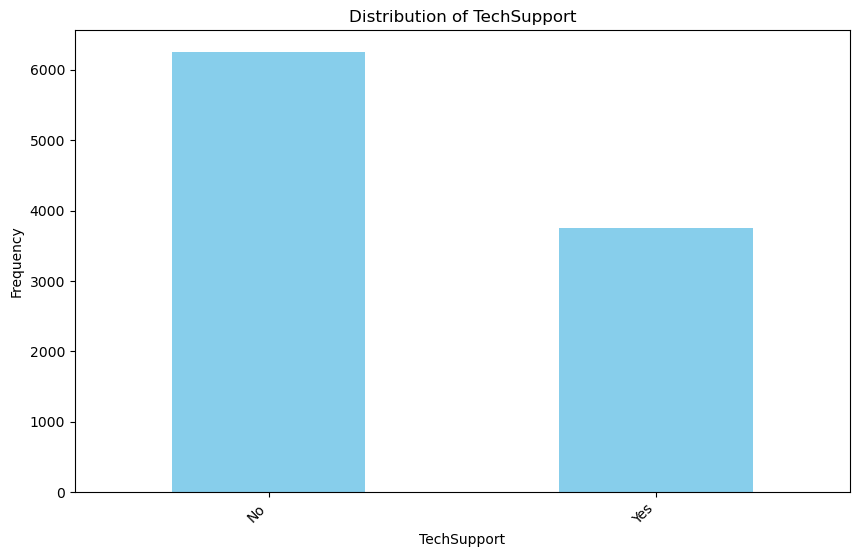


Frequency distribution for TechSupport:

No     6250
Yes    3750
Name: TechSupport, dtype: int64 



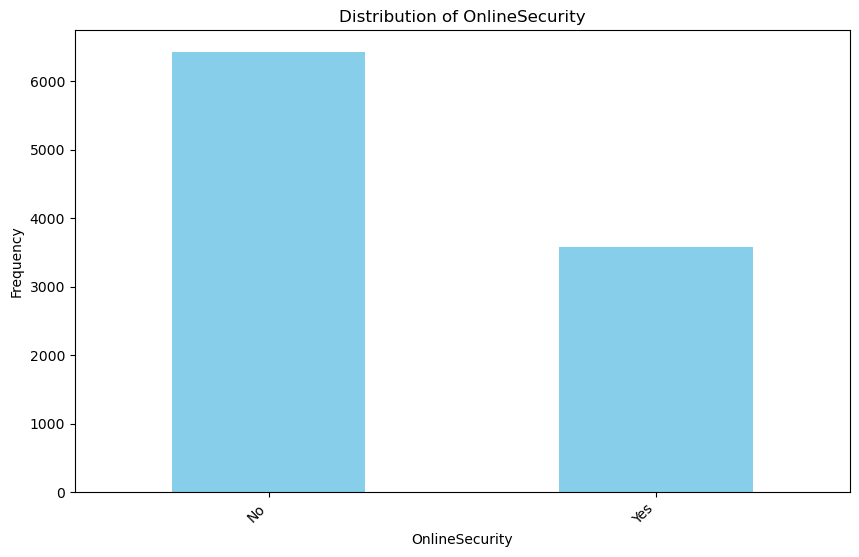


Frequency distribution for OnlineSecurity:

No     6424
Yes    3576
Name: OnlineSecurity, dtype: int64 



In [23]:
# Categorical features to analyze
categorical_features = ['Contract', 'InternetService', 'PaymentMethod', 'TechSupport', 'OnlineSecurity']

# Function to plot univariate statistics for categorical features
def plot_categorical_features(data, categorical_features):
    for feature in categorical_features:
        plt.figure(figsize=(10, 6))
        data[feature].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f'Distribution of {feature}')
        plt.xlabel(f'{feature}')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
        plt.show()
        print(f"\nFrequency distribution for {feature}:\n")
        print(data[feature].value_counts(), "\n")

# Display univariate statistics and visuals for the categorical features
plot_categorical_features(df, categorical_features)

# Bivariate Visualizations / Statistics

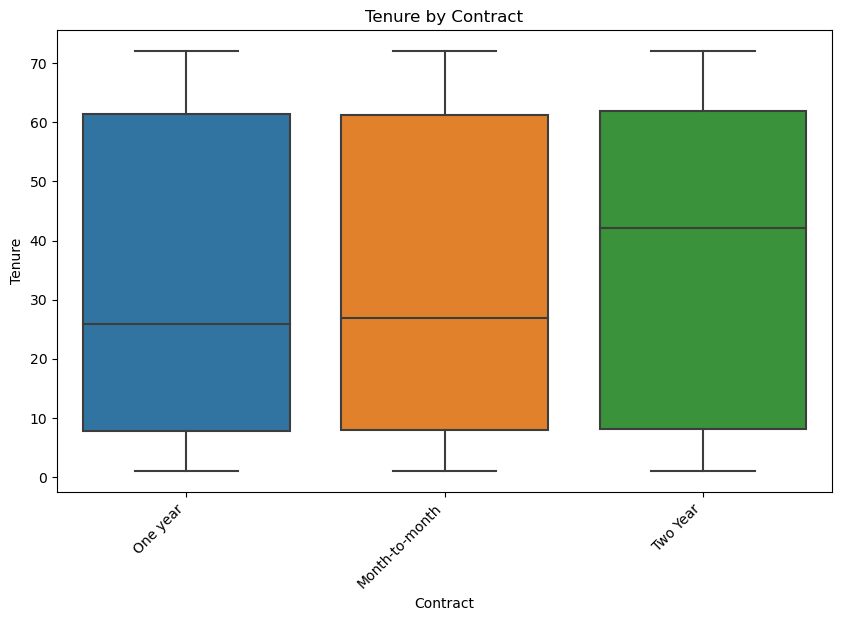


 Tenure by Contract:

                 count       mean        std   min   25%     50%      75%  \
Contract                                                                    
Month-to-month  5456.0  34.241287  26.434437  1.02  7.90  26.965  61.3025   
One year        2102.0  34.212150  26.474241  1.02  7.83  25.945  61.4500   
Two Year        2442.0  35.433038  26.425778  1.00  8.08  42.180  61.8450   

                  max  
Contract               
Month-to-month  72.00  
One year        71.97  
Two Year        71.99   



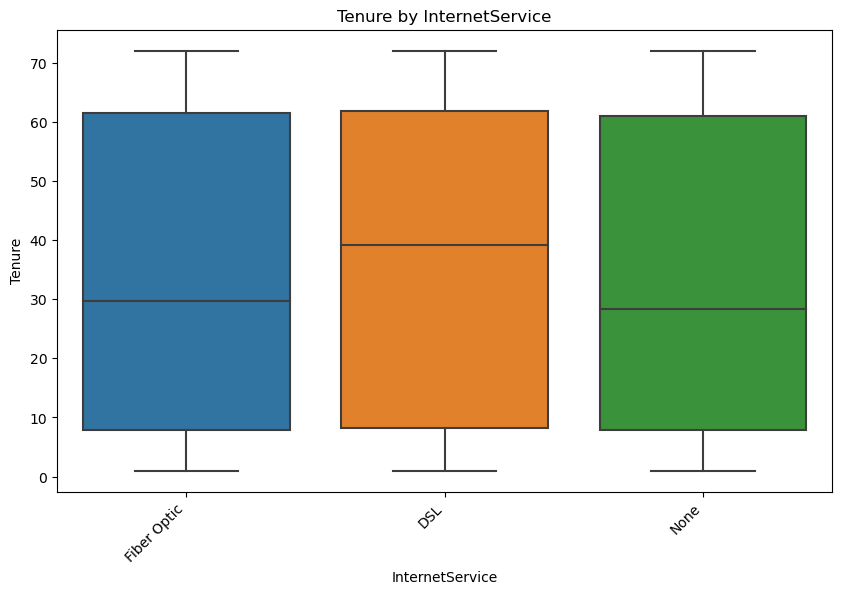


 Tenure by InternetService:

                  count       mean        std   min   25%     50%    75%  \
InternetService                                                            
DSL              3463.0  34.986630  26.453000  1.00  8.25  39.110  61.74   
Fiber Optic      4408.0  34.412414  26.459674  1.02  7.87  29.675  61.51   
None             2129.0  34.012804  26.392912  1.01  7.81  28.310  60.97   

                   max  
InternetService         
DSL              71.99  
Fiber Optic      71.99  
None             72.00   



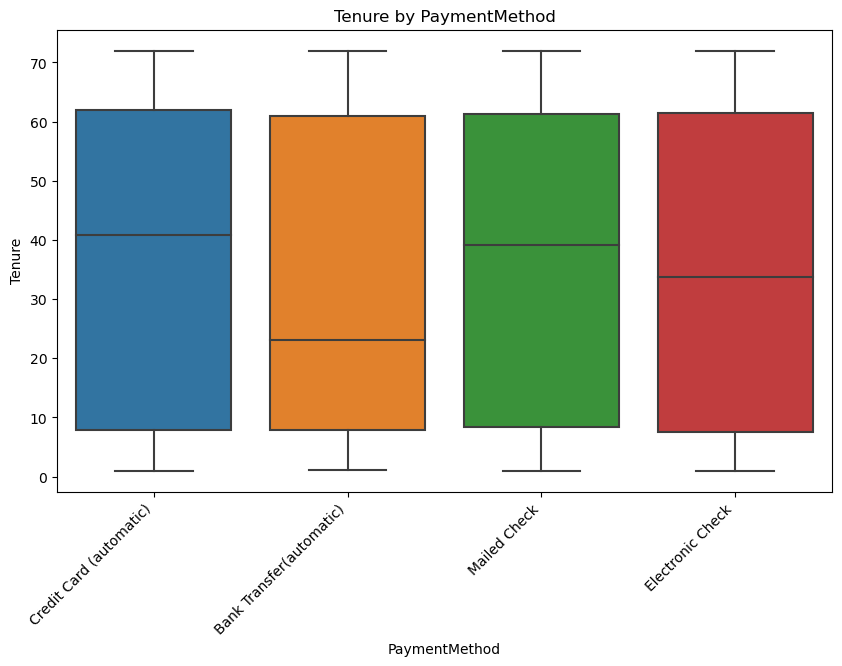


 Tenure by PaymentMethod:

                           count       mean        std   min     25%     50%  \
PaymentMethod                                                                  
Bank Transfer(automatic)  2229.0  33.823692  26.384667  1.03  7.8600  23.080   
Credit Card (automatic)   2083.0  35.119630  26.613645  1.01  7.9100  40.840   
Electronic Check          3398.0  34.419903  26.496597  1.02  7.5725  33.735   
Mailed Check              2290.0  34.827882  26.264256  1.00  8.4100  39.075   

                             75%    max  
PaymentMethod                            
Bank Transfer(automatic)  60.970  71.99  
Credit Card (automatic)   62.040  71.99  
Electronic Check          61.495  72.00  
Mailed Check              61.280  71.90   



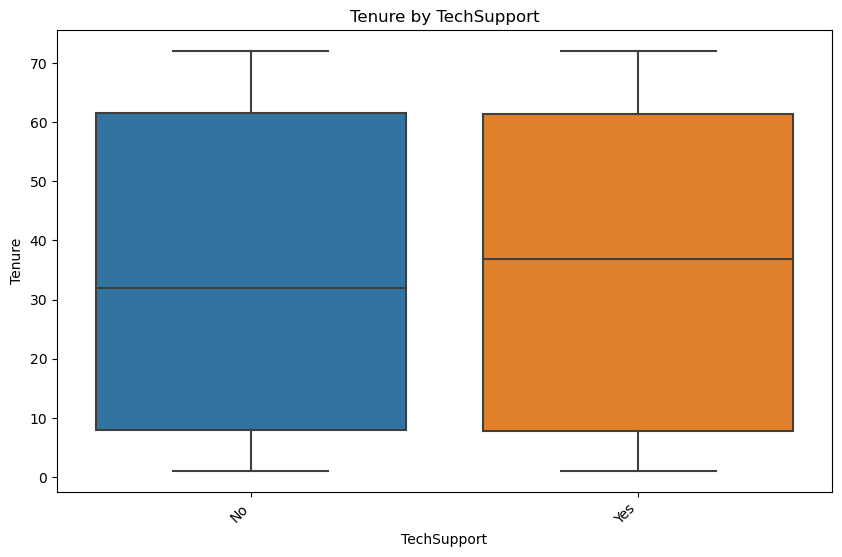


 Tenure by TechSupport:

              count       mean        std   min     25%     50%      75%  \
TechSupport                                                                
No           6250.0  34.554397  26.412547  1.00  8.0325  31.945  61.5375   
Yes          3750.0  34.479173  26.497341  1.02  7.7425  36.825  61.3475   

               max  
TechSupport         
No           72.00  
Yes          71.99   



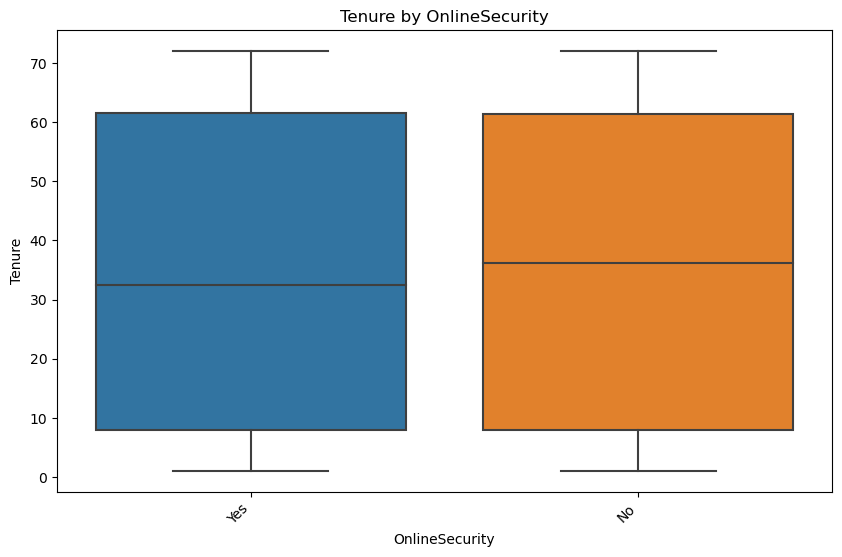


 Tenure by OnlineSecurity:

                 count       mean        std   min     25%    50%      75%  \
OnlineSecurity                                                               
No              6424.0  34.476723  26.362243  1.00  7.9375  36.27  61.4200   
Yes             3576.0  34.615048  26.591136  1.02  7.9000  32.52  61.6325   

                  max  
OnlineSecurity         
No              71.99  
Yes             72.00   



In [24]:
# Categorical vs. Tenure
for cat_feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=cat_feature, y='Tenure', data=df)
    plt.title(f'Tenure by {cat_feature}')
    plt.xticks(rotation=45, ha='right')
    plt.show()
    
    print(f"\n Tenure by {cat_feature}:\n")
    print(df.groupby(cat_feature)['Tenure'].describe(), "\n")


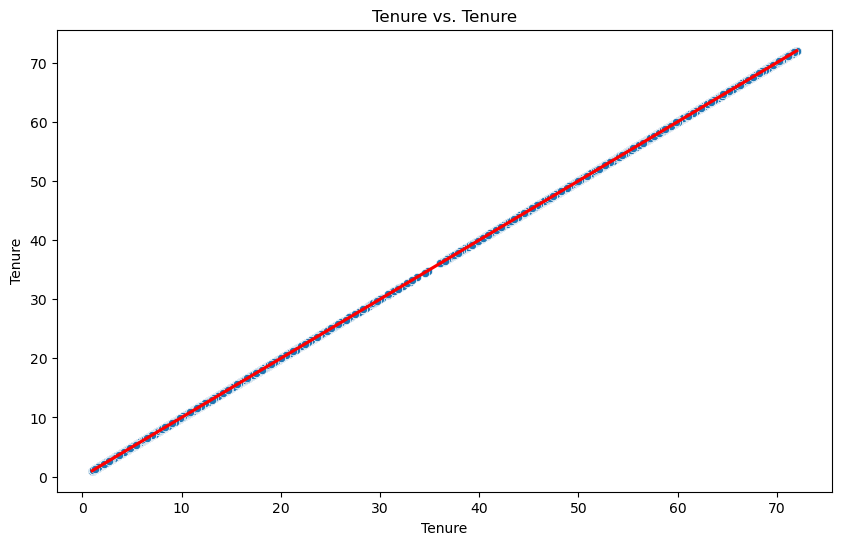

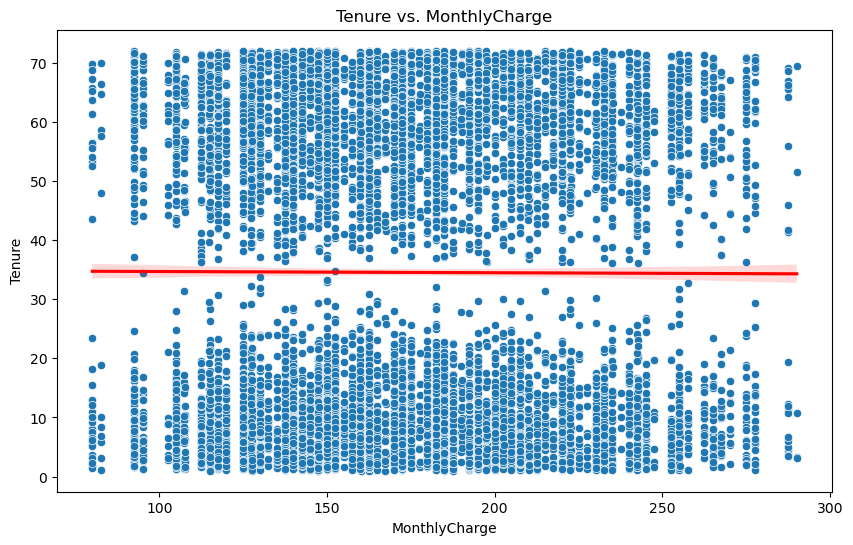

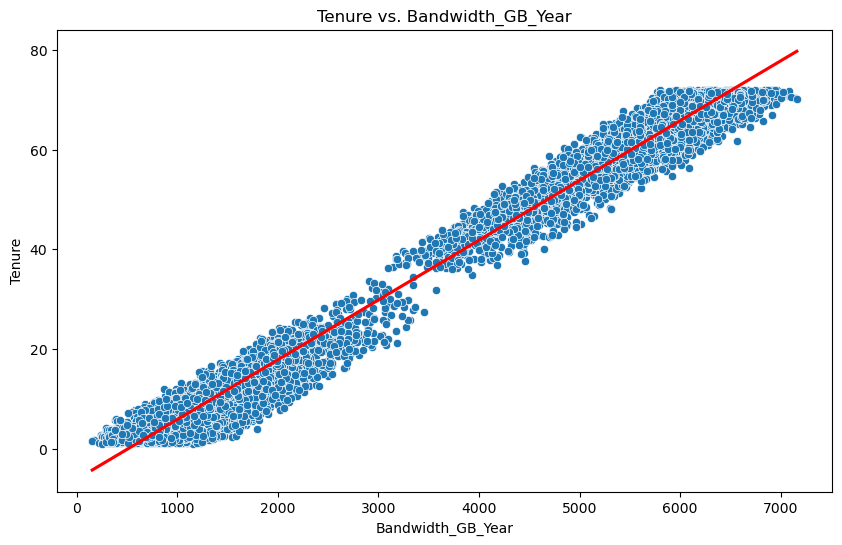

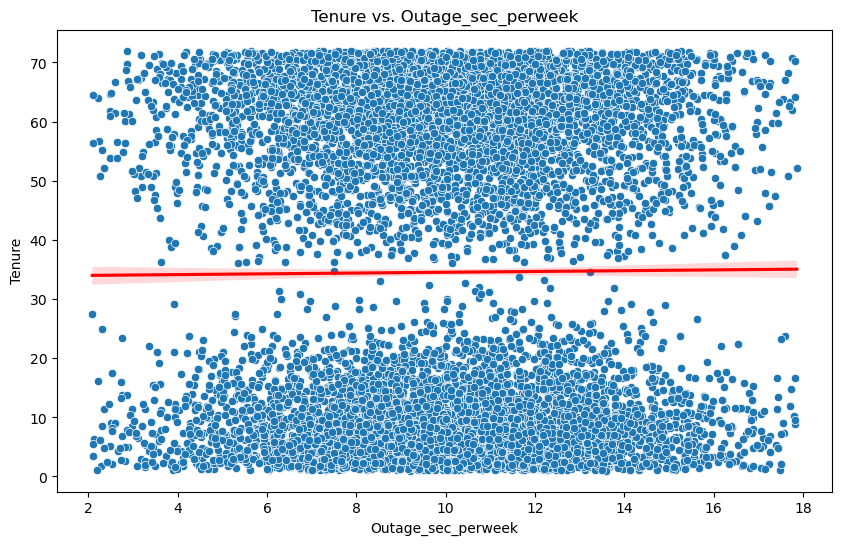

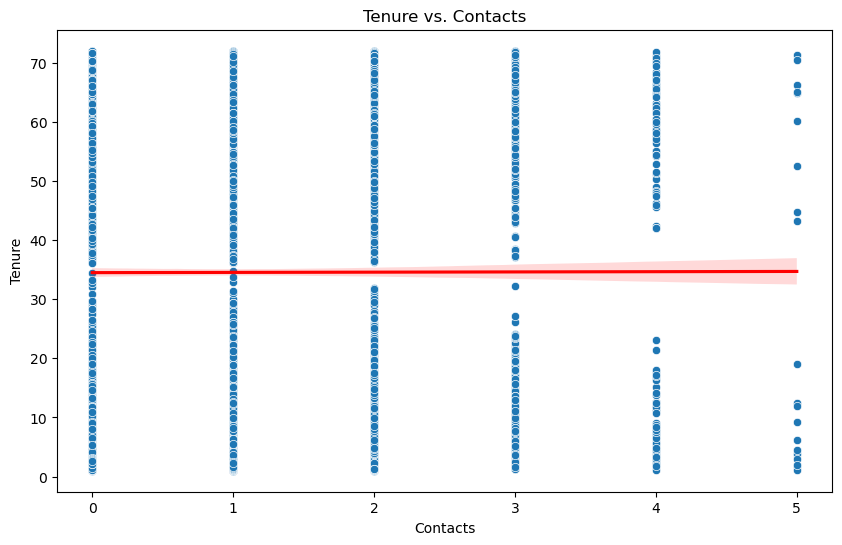

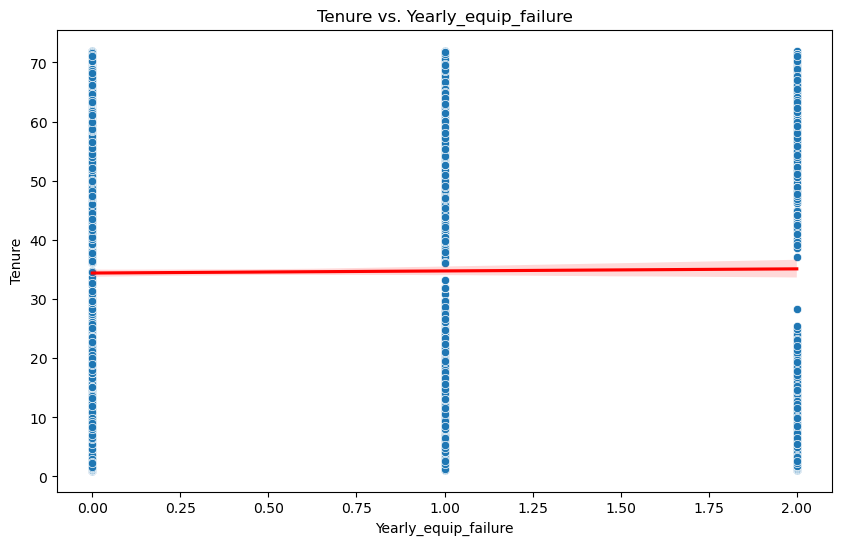

Correlation between Yearly_equip_failure and Tenure: 0.0077



In [25]:
# Bivariate Analysis: Numerical Features vs. Tenure
for num_feature in numerical_vars:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=num_feature, y='Tenure', data=df)
    sns.regplot(x=num_feature, y='Tenure', data=df, scatter=False, color='r')
    plt.title(f'Tenure vs. {num_feature}')
    plt.show()

     # Correlation between numerical feature and Tenure
correlation = df[[num_feature, 'Tenure']].corr().iloc[0, 1]
print(f'Correlation between {num_feature} and Tenure: {correlation:.4f}\n')

                        Tenure  MonthlyCharge  Bandwidth_GB_Year  \
Tenure                1.000000      -0.003337           0.991495   
MonthlyCharge        -0.003337       1.000000           0.060405   
Bandwidth_GB_Year     0.991495       0.060405           1.000000   
Outage_sec_perweek    0.007210       0.018252           0.008423   
Contacts              0.001492       0.003652           0.002149   
Yearly_equip_failure  0.007721      -0.000047           0.008052   

                      Outage_sec_perweek  Contacts  Yearly_equip_failure  
Tenure                          0.007210  0.001492              0.007721  
MonthlyCharge                   0.018252  0.003652             -0.000047  
Bandwidth_GB_Year               0.008423  0.002149              0.008052  
Outage_sec_perweek              1.000000  0.017777              0.006124  
Contacts                        0.017777  1.000000             -0.003497  
Yearly_equip_failure            0.006124 -0.003497              1.000000 

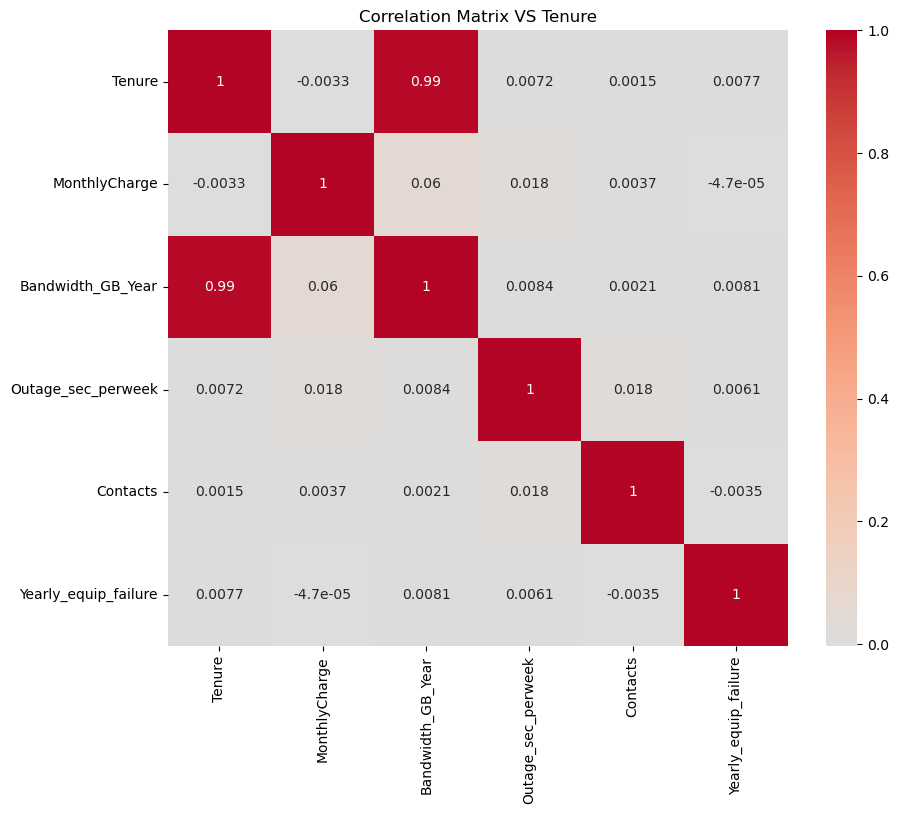

In [26]:
numerical_vars_with_tenure = ['Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Outage_sec_perweek', 'Contacts', 'Yearly_equip_failure']

# Calculating the correlation matrix
correlation_matrix_with_tenure = df[numerical_vars_with_tenure].corr()

# Display the correlation matrix
print(correlation_matrix_with_tenure)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_with_tenure, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix VS Tenure')
plt.show()

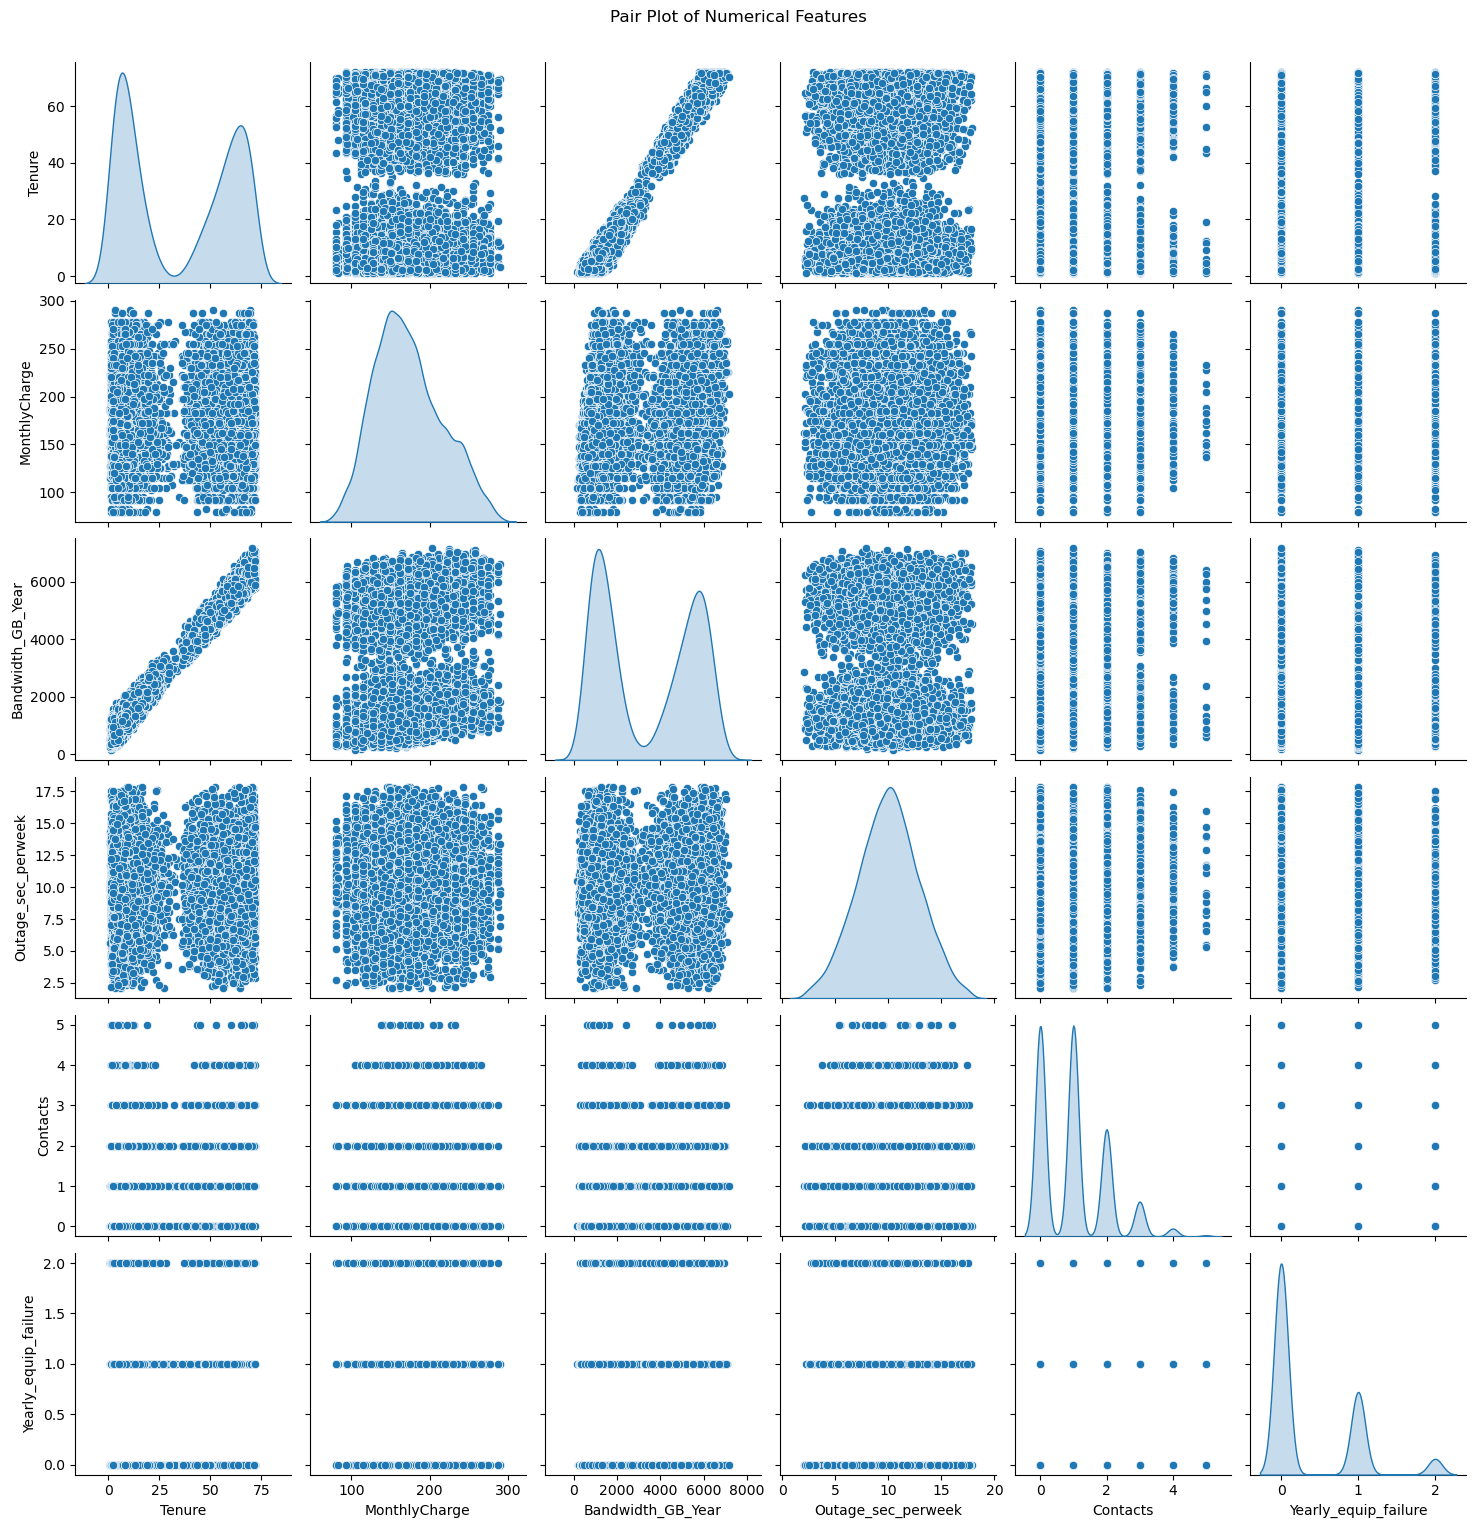

In [27]:
# Generate the pair plot
sns.pairplot(df[numerical_vars], diag_kind='kde')  
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

# Modeling Statistics

In [28]:
# Selecting the numerical and categorical features
numerical_features = ['Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Outage_sec_perweek', 'Contacts', 'Yearly_equip_failure']
categorical_features = ['Contract', 'InternetService', 'PaymentMethod', 'TechSupport', 'OnlineSecurity']

# Create a new df with only the selected numerical and categorical features
df1 = df[numerical_features + categorical_features]


# Displaying the first few rows of the new DataFrame
print(df1.head())



   Tenure  MonthlyCharge  Bandwidth_GB_Year  Outage_sec_perweek  Contacts  \
0    6.80         172.46             904.54                7.98       0.0   
1    1.16         242.63             800.98               11.70       0.0   
2   15.75         159.95            2054.71               10.75       0.0   
3   17.09         119.96            2164.58               14.91       2.0   
4    1.67         149.95             271.49                8.15       2.0   

   Yearly_equip_failure        Contract InternetService  \
0                   1.0        One year     Fiber Optic   
1                   1.0  Month-to-month     Fiber Optic   
2                   1.0        Two Year             DSL   
3                   0.0        Two Year             DSL   
4                   1.0  Month-to-month     Fiber Optic   

              PaymentMethod TechSupport OnlineSecurity  
0   Credit Card (automatic)          No            Yes  
1  Bank Transfer(automatic)          No            Yes  
2   Credit 

# Data Modeling 

In [29]:
# One-hot encode the categorical features
df_encoded = pd.get_dummies(df1[categorical_features], drop_first=True)

# Combine the numerical and encoded categorical features
X = pd.concat([df1[numerical_features], df_encoded], axis=1)

# Create a variable for the modeling data and save file to csv. 
d208_modeling_data = 'd208_modeling_data.csv'
X.to_csv(d208_modeling_data, index=False)

# Ensure all data is numerical
X = X.astype(float)

# Drop the target variable
X.drop('Tenure', axis=1, inplace=True)

# Define the target variable
y = df1['Tenure']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Display the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.664e+05
Date:                Wed, 04 Sep 2024   Prob (F-statistic):               0.00
Time:                        01:08:53   Log-Likelihood:                -17311.
No. Observations:               10000   AIC:                         3.465e+04
Df Residuals:                    9985   BIC:                         3.476e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [30]:
def backward_elimination(X, y, significance_level=0.05):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    while True:
        p_values = model.pvalues
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            excluded_feature = p_values.idxmax()
            X = X.drop(columns=[excluded_feature])
            model = sm.OLS(y, X).fit()
        else:
            break
    return model

# Apply backward elimination
final_model = backward_elimination(X, y)
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 6.214e+05
Date:                Wed, 04 Sep 2024   Prob (F-statistic):               0.00
Time:                        01:08:53   Log-Likelihood:                -17316.
No. Observations:               10000   AIC:                         3.465e+04
Df Residuals:                    9993   BIC:                         3.470e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

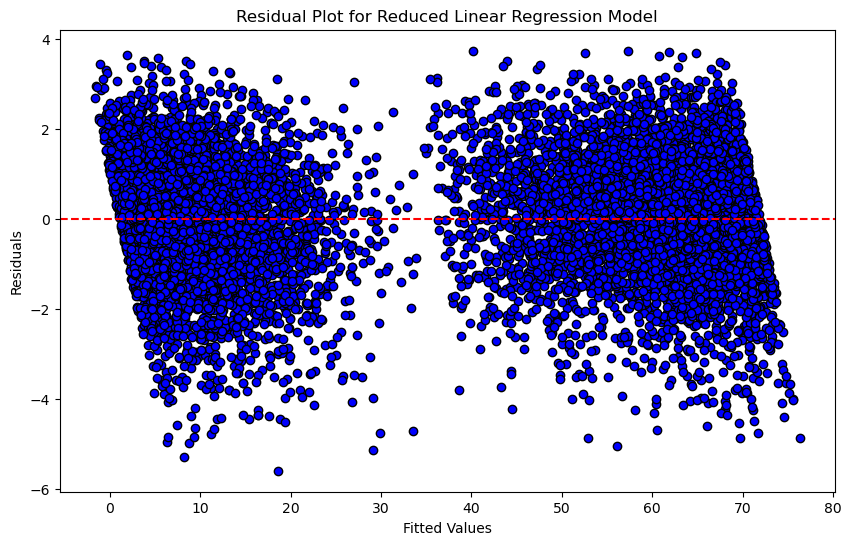

Residual Standard Error (RSE): 1.3675781456357246


In [31]:
# Define the independent variables 
X_reduced = X[['OnlineSecurity_Yes','InternetService_None','InternetService_Fiber Optic','MonthlyCharge','Bandwidth_GB_Year','TechSupport_Yes']]

# Add a constant to the model 
X_reduced = sm.add_constant(X_reduced)

# Define the dependent variable
y = df1['Tenure']

# Fit the reduced multiple linear regression model
reduced_model = sm.OLS(y, X_reduced).fit()

# Calculate the residuals
residuals = reduced_model.resid

# Plotting the residual plot
plt.figure(figsize=(10, 6))
plt.scatter(reduced_model.fittedvalues, residuals, color='blue', edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot for Reduced Linear Regression Model')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Calculate the Residual Standard Error (RSE)
n = len(y)
p = X_reduced.shape[1] - 1  
RSS = sum(residuals**2)
RSE = (RSS / (n - p - 1)) ** 0.5

print("Residual Standard Error (RSE):", RSE)

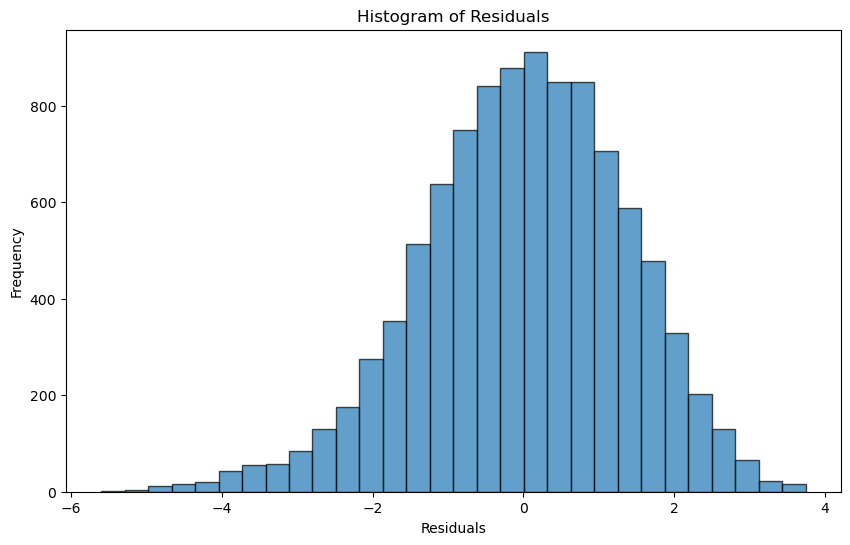

Residual Standard Error (RSE): 1.3675781456357246


In [32]:
# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Residual Standard Error (RSE)
n = len(y)
p = X_reduced.shape[1] - 1  
RSS = sum(residuals**2)
RSE = (RSS / (n - p - 1)) ** 0.5

print("Residual Standard Error (RSE):", RSE)
